# Explore flight delay data wrt day of week

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

# Load data

In [2]:
# Import custom code
from flightdelay.fld import io as flio
airlines_df, airports_df, flights_df = flio.load_data()

In [3]:
# Filter data to keys of interest
keys = ['ORIGIN_AIRPORT','DEPARTURE_DELAY']
flights_df = flights_df[keys]

In [4]:
all_airports, airport_inverse, airport_count = np.unique(flights_df['ORIGIN_AIRPORT'],return_counts=True,return_inverse=True)

# Determine number of flights for the origin airport
Nflights_orig = np.zeros(len(airport_inverse))
for i in range(len(all_airports)):
    Nflights_orig[np.where(airport_inverse==i)] = airport_count[i]
    
flights_df = flights_df.loc[flights_df.index[Nflights_orig>=7300]]

In [5]:
# Remove cancelled flights
flights_df = flights_df.dropna()
flights_df.head()

,ORIGIN_AIRPORT,DEPARTURE_DELAY
0,ANC,-11.0
1,LAX,-8.0
2,SFO,-2.0
3,LAX,-5.0
4,SEA,-1.0


# groupby airport

In [6]:
gbap = flights_df.groupby('ORIGIN_AIRPORT')
ap_mean = gbap.agg(['mean','count','sem'])

In [7]:
ap_mean

DEPARTURE_DELAY                  
                          mean   count       sem
ORIGIN_AIRPORT                                  
ABQ                   8.623101   20796  0.277084
ALB                   6.343321    8077  0.385017
ANC                   3.249737   17134  0.241957
ATL                   8.899211  376945  0.052336
AUS                  10.015952   45387  0.188678
BDL                   7.141489   20150  0.241813
BHM                   8.847118   13481  0.375609
BNA                   9.446921   51009  0.165271
BOI                   8.427617   12717  0.406003
BOS                   9.213990  115393  0.107072
BTR                  10.746082    7656  0.540593
BUF                   6.873053   18102  0.273544
BUR                   5.733314   20331  0.195382
BWI                  12.893989   92604  0.122834
CHS                   8.334662   12792  0.363598
CID                   9.271239    7145  0.550417
CLE                   8.095089   37081  0.212352
CLT                   8.108012  108858  0.095193
CMH                   9.191891   25848  0.258085
COS                   8.990375    7377  0.551658
CVG                   8.826792   21454  0.283060
DAL                  11.880144   64761  0.123792
DAY                   7.155706    9139  0.376326
DCA                   7.744891   78641  0.133174
DEN                  11.327934  212183  0.075469
DFW                  11.160032  254305  0.071953
DSM                   9.991635    8846  0.506787
DTW                   8.794979  117217  0.104961
ELP                   7.796043   12890  0.347614
EWR                  13.182294  108281  0.120245
...                        ...     ...       ...
ORF                   9.223186   10032  0.458036
PBI                  11.791319   23960  0.267707
PDX                   5.045400   51432  0.140140
PHL                  10.072042   71084  0.142648
PHX                   8.340602  158895  0.076507
PIT                   6.310475   25870  0.214805
PSP                   7.838440    9563  0.448394
PVD                   7.253071   11886  0.305067
RDU                   9.258661   34176  0.208171
RIC                   9.735223   16580  0.380552
RNO                   7.678100   14023  0.299064
ROC                   7.536308    8001  0.502388
RSW                   8.385767   28792  0.225582
SAN                   7.978263   75630  0.123378
SAT                   7.394120   32074  0.206333
SAV                  10.471595    8062  0.452058
SDF                   8.399908   10825  0.390451
SEA                   6.538400  120847  0.085046
SFO                  10.760883  160068  0.094830
SJC                   7.070154   41238  0.151747
SJU                   9.836238   26337  0.276138
SLC                   4.475126  105612  0.089795
SMF                   7.723432   40471  0.169057
SNA                   6.307208   40344  0.147891
STL                   9.095578   50629  0.156339
TPA                   9.738127   68434  0.147975
TUL                   7.244872   15065  0.320340
TUS                   5.627834   16275  0.274677
TYS                  10.150000    7420  0.527992
XNA                  11.189407    9931  0.490324

[98 rows x 3 columns]

# Visualize for all airports

In [15]:
aps = np.array(list(ap_mean.index))
means = np.array(list(ap_mean['DEPARTURE_DELAY']['mean']))
sems = np.array(list(ap_mean['DEPARTURE_DELAY']['sem']))

In [19]:
aps = aps[np.argsort(means)]
sems = sems[np.argsort(means)]
means = means[np.argsort(means)]

/Users/scott/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


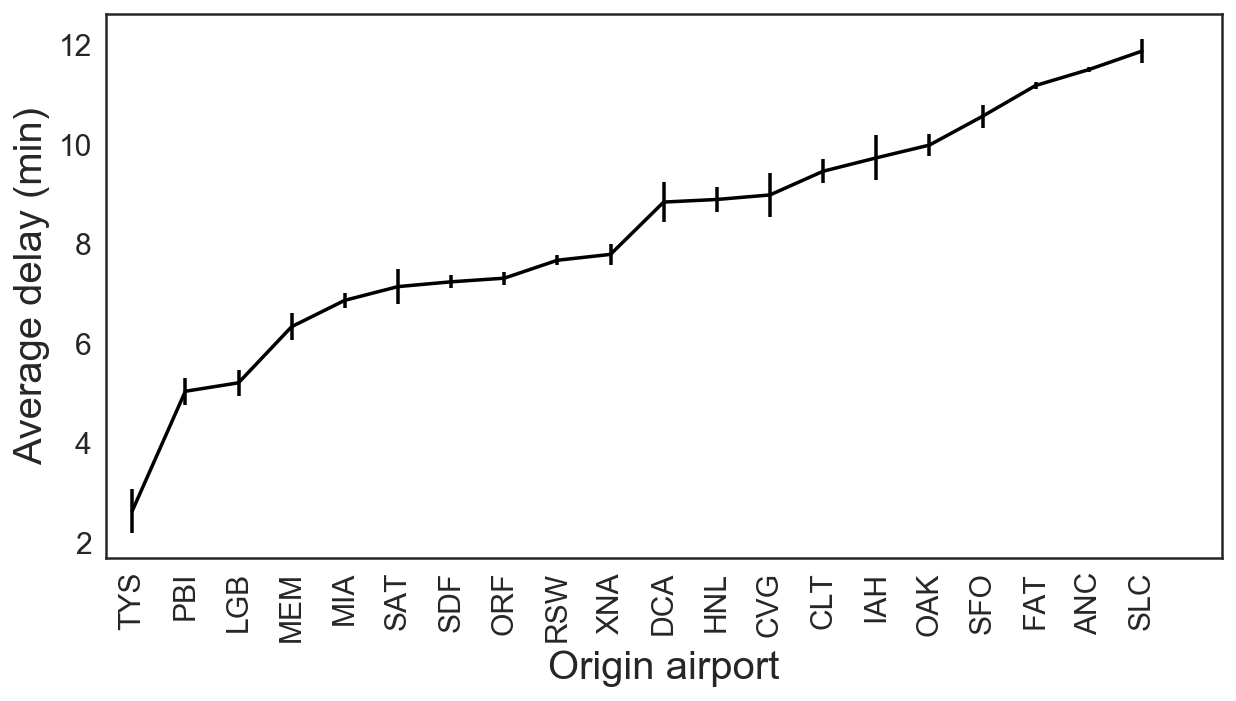

In [35]:
N = 20
np.random.seed(0)
aps_plt = np.random.permutation(np.arange(len(aps)))[:N]
aps_plt = aps_plt[np.argsort(aps_plt)]
plt.figure(figsize=(10,5))
plt.errorbar(np.arange(len(aps[aps_plt])), means[aps_plt], yerr=sems[aps_plt],color='k')
plt.xlabel('Origin airport',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.xlim((-.5,N+.5))
plt.yticks(size=15)
plt.xticks(np.arange(len(aps[aps_plt])),aps[aps_plt],size=15,rotation='vertical')
plt.legend(loc='best',fontsize=12)